In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# Substitua 'caminho/do/arquivo/titanic.csv' pelo caminho real do arquivo, caso não esteja na mesma pasta do Jupyter Notebook
caminho_arquivo = 'titanic.csv'

# Carregar o arquivo CSV em um DataFrame usando a função read_csv do Pandas
df_titanic = pd.read_csv(caminho_arquivo)

# Visualizar as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Remover as colunas 'Name', 'Cabin' e 'Ticket'
colunas_para_remover = ['Name', 'Cabin', 'Ticket']
df_titanic = df_titanic.drop(columns=colunas_para_remover)

# Visualizar as primeiras linhas do DataFrame após a remoção das colunas
df_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [6]:
# Criar um mapeamento para a variável 'Sex'
mapeamento_sex = {'male': 0, 'female': 1}
df_titanic['Sex'] = df_titanic['Sex'].map(mapeamento_sex)

# Criar um mapeamento para a variável 'Embarked'
mapeamento_embarked = {'C': 0, 'Q': 1, 'S': 2}
df_titanic['Embarked'] = df_titanic['Embarked'].map(mapeamento_embarked)

# Visualizar as primeiras linhas do DataFrame após a modificação das variáveis categóricas
df_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2.0
1,2,1,1,1,38.0,1,0,71.2833,0.0
2,3,1,3,1,26.0,0,0,7.9250,2.0
3,4,1,1,1,35.0,1,0,53.1000,2.0
4,5,0,3,0,35.0,0,0,8.0500,2.0


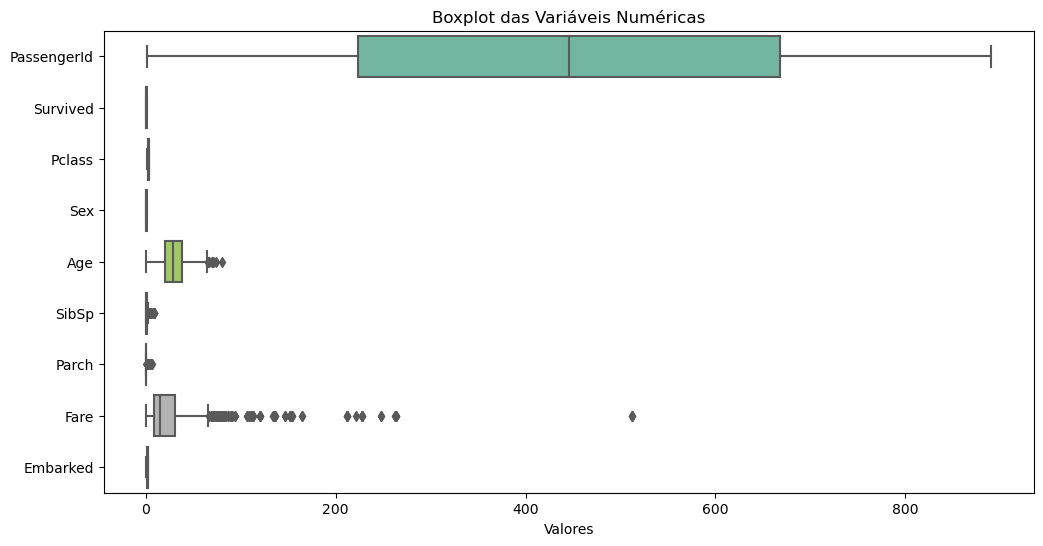

In [8]:
# Plotar boxplots para as variáveis numéricas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_titanic, orient="h", palette="Set2")
plt.title("Boxplot das Variáveis Numéricas")
plt.xlabel("Valores")
plt.show()

In [9]:
# Função para remover outliers usando o método IQR
def remover_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_filtrado = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]
    return df_filtrado

# Escolher as colunas numéricas para remover outliers, por exemplo, 'Age' e 'Fare'
colunas_numericas = ['Age', 'Fare']

# Remover outliers para cada coluna numérica selecionada
for col in colunas_numericas:
    df_titanic = remover_outliers_iqr(df_titanic, col)

# Visualizar as primeiras linhas do DataFrame após a remoção dos outliers
df_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2.0
2,3,1,3,1,26.0,0,0,7.9250,2.0
3,4,1,1,1,35.0,1,0,53.1000,2.0
4,5,0,3,0,35.0,0,0,8.0500,2.0
6,7,0,1,0,54.0,0,0,51.8625,2.0


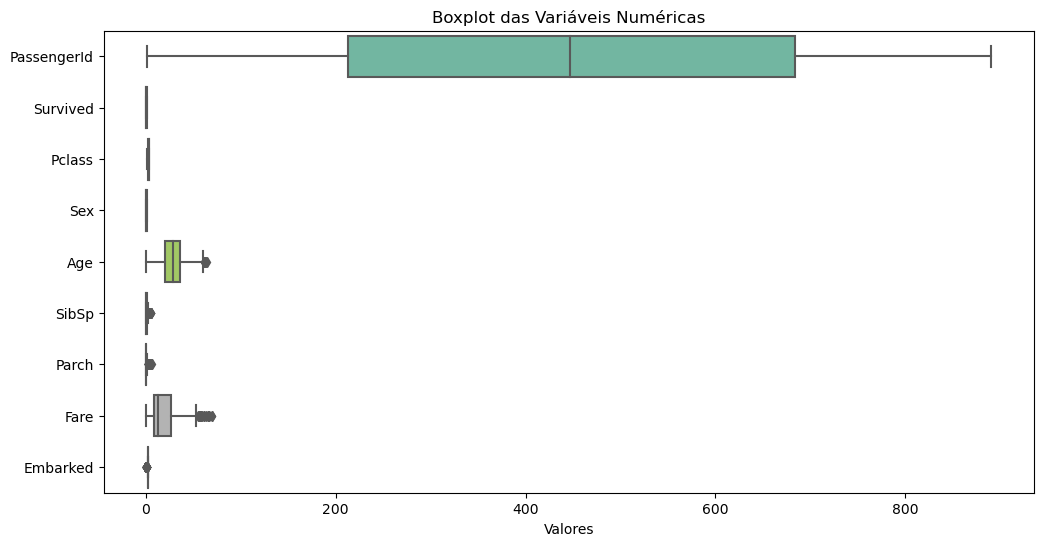

In [10]:
# Plotar boxplots para as variáveis numéricas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_titanic, orient="h", palette="Set2")
plt.title("Boxplot das Variáveis Numéricas")
plt.xlabel("Valores")
plt.show()

In [11]:
# Remover os valores ausentes (missing) do DataFrame
df_titanic = df_titanic.dropna()

In [13]:
# Selecionar as colunas de interesse para a predição
colunas_interesse = ['Sex', 'Age', 'Fare', 'Survived']
df_titanic_pred = df_titanic[colunas_interesse]


# Definir as variáveis independentes (X) e a variável dependente (y)
X = df_titanic_pred[['Sex', 'Age', 'Fare']]
y = df_titanic_pred['Survived']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Regressão Logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Realizar a predição nos dados de teste
y_pred = modelo.predict(X_test)

# Calcular a acurácia do modelo (porcentagem de acertos)
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {acuracia:.2f}")

Acurácia do modelo: 0.75


In [14]:
# Dados fictícios para a massa de teste
dados_teste = {
    'Sex': ['male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female'],
    'Age': [30, 25, 45, 18, 60, 22, 35, 28, 55, 40],
    'Fare': [50.0, 30.0, 12.5, 8.0, 100.0, 20.0, 40.0, 35.0, 70.0, 60.0]
}

# Criar DataFrame com os dados fictícios
df_teste = pd.DataFrame(dados_teste)

# Converter a coluna 'Sex' para valores numéricos (0 para male, 1 para female)
df_teste['Sex'] = df_teste['Sex'].map({'male': 0, 'female': 1})

# Visualizar a massa de teste
print(df_teste)

   Sex  Age   Fare
0    0   30   50.0
1    1   25   30.0
2    0   45   12.5
3    1   18    8.0
4    0   60  100.0
5    1   22   20.0
6    0   35   40.0
7    1   28   35.0
8    0   55   70.0
9    1   40   60.0


In [15]:
# Fazer previsões com o modelo treinado
previsoes = modelo.predict(df_teste[['Sex', 'Age', 'Fare']])

# Adicionar as previsões ao DataFrame de teste
df_teste['Survived'] = previsoes

# Visualizar o DataFrame com as previsões
print(df_teste)

   Sex  Age   Fare  Survived
0    0   30   50.0         0
1    1   25   30.0         1
2    0   45   12.5         0
3    1   18    8.0         1
4    0   60  100.0         1
5    1   22   20.0         1
6    0   35   40.0         0
7    1   28   35.0         1
8    0   55   70.0         1
9    1   40   60.0         1


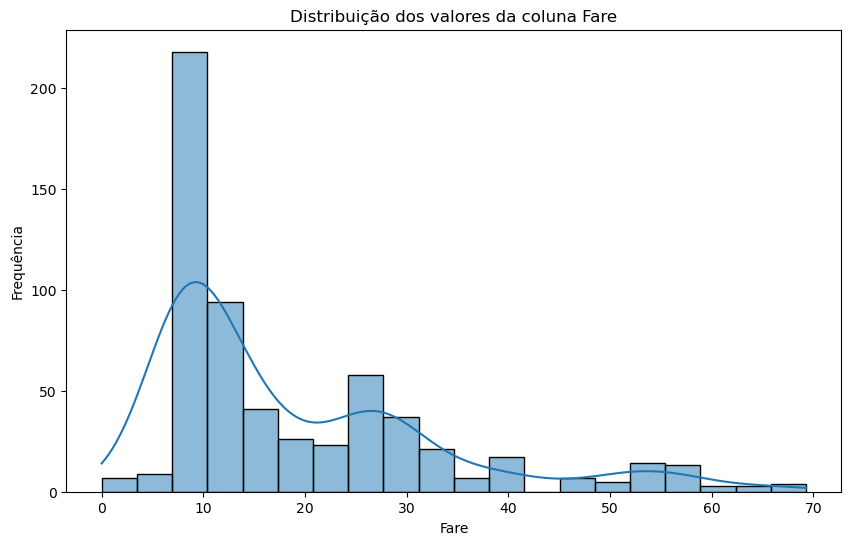

In [16]:
# Plotar gráfico de barras para a coluna 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_titanic, x='Fare', bins=20, kde=True)
plt.title("Distribuição dos valores da coluna Fare")
plt.xlabel("Fare")
plt.ylabel("Frequência")
plt.show()